In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def clustering(data, participants): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
        kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k

In [3]:
def silhouette(data, clusters):
    kmeans = KMeans(n_clusters = clusters, max_iter = 500, random_state = 0)
    kmeans.fit_predict(data)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')#ax[q-1][mod])#, ax = ax[x%3][y%2]
    
    #Fit the visualizer
    visualizer.fit(data)
    #fig, ax = plt.subplots(3,2, figsize = (10,10))

# Lifesnaps

In [137]:
lifesnaps = pd.read_csv("Final_CSVs/lifesnaps_new.csv")

In [138]:
lifesnaps_personality = pd.read_csv('scored_surveys/personality.csv')

In [139]:
lifesnaps_personality = lifesnaps_personality.drop(["Unnamed: 0", "submitdate"], axis = 1)
lifesnaps_personality = lifesnaps_personality.drop("type", axis = 1)
lifesnaps_personality.rename(columns={"user_id": "id"}, inplace=True)

In [140]:
lifesnaps_personality

,id,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,21.0,33.0,45.0,42.0,40.0,MALE,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2eaf67b776a2406b14ac,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,HIGH,AVERAGE,LOW,HIGH
2,621e2ed667b776a24085d8d1,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE
3,621e2f3967b776a240c654db,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,AVERAGE,LOW,HIGH,AVERAGE
4,621e2f6167b776a240e082a9,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,AVERAGE,AVERAGE,HIGH,LOW
5,621e2f7a67b776a240f14425,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,AVERAGE,HIGH,HIGH,AVERAGE
6,621e2f9167b776a240011ccb,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,HIGH,AVERAGE,LOW,HIGH
7,621e2fb367b776a24015accd,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,AVERAGE,LOW,LOW,HIGH
8,621e2fce67b776a240279baa,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,HIGH,AVERAGE,LOW,AVERAGE
9,621e2ff067b776a2403eb737,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,HIGH,LOW,LOW,LOW


In [141]:
le = preprocessing.LabelEncoder()

lifesnaps_personality['gender'] = le.fit_transform(lifesnaps_personality['gender'])
lifesnaps_personality['ipip_extraversion_category'] = le.fit_transform(lifesnaps_personality['ipip_extraversion_category'])
lifesnaps_personality['ipip_agreeableness_category'] = le.fit_transform(lifesnaps_personality['ipip_agreeableness_category'])
lifesnaps_personality['ipip_conscientiousness_category'] = le.fit_transform(lifesnaps_personality['ipip_conscientiousness_category'])
lifesnaps_personality['ipip_stability_category'] = le.fit_transform(lifesnaps_personality['ipip_stability_category'])
lifesnaps_personality['ipip_intellect_category'] = le.fit_transform(lifesnaps_personality['ipip_intellect_category'])

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]] = scaler.fit_transform(lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]])

## Multi-Attribute-Splittng (All Features)

In [143]:
lifesnaps

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,dataset,stress
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,20.0,22,-0.988831,-1.490423e-01,4,-0.900969,-0.433884,2021,Train,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,...,NaN,28,-0.500000,-8.660254e-01,0,1.000000,0.000000,2021,Train,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,...,109.0,50,0.365341,9.308737e-01,5,-0.222521,-0.974928,2021,Train,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.0,...,0.0,35,0.500000,-8.660254e-01,4,-0.900969,-0.433884,2021,Train,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,...,0.0,26,-0.733052,-6.801727e-01,5,-0.222521,-0.974928,2021,Train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,2,0.955573,2.947552e-01,5,-0.222521,-0.974928,2022,Test,0
7406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0,...,0.0,28,-0.500000,-8.660254e-01,1,0.623490,0.781831,2021,Test,0
7407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.0,...,0.0,51,0.222521,9.749279e-01,4,-0.900969,-0.433884,2021,Test,0
7408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,...,0.0,32,0.074730,-9.972038e-01,4,-0.900969,-0.433884,2021,Test,0


In [144]:
lifesnaps_all_features = lifesnaps.loc[:, ~lifesnaps.columns.isin(['stress', 'dataset', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME1OFFICE', 'OTHER', 'OUTDOORS',
       'TRANSIT', 'WORK/SCHOOL','month', 'month1cos', 'month1sin', 'week', 'week1cos', 'week1sin', 'weekday', 'weekday1cos', 'weekday1sin', 'year', 'day', 'day1cos', 'day1sin'])]
lifesnaps_all_features

,age,bmi,bpm,calories,daily1temperature1variation,distance,filteredDemographicVO2Max,full1sleep1breathing1rate,gender,id,...,sleep1duration,sleep1efficiency,sleep1light1ratio,sleep1rem1ratio,sleep1wake1ratio,spo2,step1goal,step1goal1label,steps,very1active1minutes
0,1.0,23.0,91.659123,3241.52,-0.460087,9275.7,48.07785,NaN,0.0,621e329067b776a2402ffad2,...,21360000.0,95.0,0.689119,1.179104,1.378378,NaN,9999.0,4.0,12974.0,20.0
1,1.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,621e2f1b67b776a240b3d87c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,20.0,90.021444,2523.09,-1.986618,6187.5,49.72347,11.6,1.0,621e339967b776a240e502de,...,30780000.0,98.0,0.970954,1.364583,0.732394,94.9,NaN,NaN,17479.0,109.0
3,0.0,21.0,NaN,1800.00,NaN,NaN,NaN,NaN,0.0,621e332267b776a24092a584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,30.0,NaN,2318.40,NaN,NaN,NaN,NaN,0.0,621e32d967b776a240627414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,NaN,NaN,82.571340,1429.29,NaN,1723.5,36.39159,NaN,NaN,621e346f67b776a24081744f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2595.0,10.0
7406,0.0,24.0,NaN,1612.80,NaN,NaN,NaN,NaN,0.0,621e34ec67b776a240d60873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7407,0.0,18.0,NaN,1713.60,NaN,NaN,NaN,NaN,0.0,621e309267b776a240ae1cdb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7408,1.0,30.0,NaN,2318.40,NaN,NaN,NaN,NaN,0.0,621e32d967b776a240627414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [145]:
lifesnaps_all_features.columns

Index(['age', 'bmi', 'bpm', 'calories', 'daily1temperature1variation',
       'distance', 'filteredDemographicVO2Max', 'full1sleep1breathing1rate',
       'gender', 'id', 'lightly1active1minutes', 'max1goal', 'min1goal',
       'mindfulness1session', 'minutesAfterWakeup', 'minutesAsleep',
       'minutesAwake', 'minutesToFallAsleep', 'minutes1below1default1zone11',
       'minutes1in1default1zone11', 'minutes1in1default1zone12',
       'minutes1in1default1zone13', 'moderately1active1minutes',
       'nightly1temperature', 'nremhr', 'resting1hr', 'rmssd', 'scl1avg',
       'sedentary1minutes', 'sleep1deep1ratio', 'sleep1duration',
       'sleep1efficiency', 'sleep1light1ratio', 'sleep1rem1ratio',
       'sleep1wake1ratio', 'spo2', 'step1goal', 'step1goal1label', 'steps',
       'very1active1minutes'],
      dtype='object')

In [146]:
lifesnaps_mean = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).mean()
lifesnaps_mean.columns = map(lambda x: x + '_mean', lifesnaps_mean.columns)
lifesnaps_mean = lifesnaps_mean.rename({'id_mean': 'id'}, axis='columns')
lifesnaps_mean

lifesnaps_min = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).min()
lifesnaps_min.columns = map(lambda x: x + '_min', lifesnaps_min.columns)
lifesnaps_min = lifesnaps_min.rename({'id_min': 'id'}, axis='columns')
lifesnaps_min

lifesnaps_std = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).std()
lifesnaps_std.columns = map(lambda x: x + '_std', lifesnaps_std.columns)
lifesnaps_std = lifesnaps_std.rename({'id_std': 'id'}, axis='columns')
lifesnaps_std

,id,age_std,bmi_std,bpm_std,calories_std,daily1temperature1variation_std,distance_std,filteredDemographicVO2Max_std,full1sleep1breathing1rate_std,gender_std,...,sleep1duration_std,sleep1efficiency_std,sleep1light1ratio_std,sleep1rem1ratio_std,sleep1wake1ratio_std,spo2_std,step1goal_std,step1goal1label_std,steps_std,very1active1minutes_std
0,621e2e8e67b776a24055b564,0.0,0.0,3.115235,268.393641,0.570898,2495.171517,0.593936,0.569264,0.0,...,3.470355e+06,2.005752,0.159124,0.250086,0.188958,NaN,2708.012802,0.847319,3384.097986,16.297671
1,621e2eaf67b776a2406b14ac,0.0,0.0,3.885394,361.985428,0.593731,4162.391371,1.380626,0.536698,0.0,...,5.942277e+06,2.696577,0.282058,0.361365,0.329824,NaN,0.000000,0.000000,5973.028379,22.312539
2,621e2ed667b776a24085d8d1,0.0,0.0,4.278665,191.883956,0.644815,1739.393218,0.797480,5.797068,0.0,...,5.434833e+06,3.405877,0.230605,0.411375,0.348230,NaN,3228.233061,1.015038,2616.982198,5.371150
3,621e2ef567b776a24099f889,0.0,0.0,18.439423,421.581261,NaN,3374.706124,0.414427,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4842.354770,13.890850
4,621e2efa67b776a2409dd1c3,0.0,0.0,6.611945,444.840078,0.723875,3454.517701,1.348074,NaN,0.0,...,6.156437e+06,2.541268,0.200754,0.321502,0.256729,0.972034,NaN,NaN,4858.421862,16.780661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,621e36c267b776a240ba2756,0.0,0.0,6.067612,572.812881,0.488540,3393.013595,0.457191,NaN,0.0,...,5.411164e+06,2.297508,0.239305,0.303629,0.331738,NaN,2758.602927,0.841897,4245.010432,29.729212
67,621e36dd67b776a240ce9a45,0.0,0.0,8.715774,559.326386,NaN,3791.787320,1.157102,NaN,0.0,...,2.949983e+06,1.154701,NaN,NaN,NaN,NaN,1602.554779,0.426401,4911.054001,29.397413
68,621e36f967b776a240e5e7c9,0.0,0.0,6.304942,401.149188,0.634171,4012.881654,0.415635,0.494495,0.0,...,4.873251e+06,1.878103,0.164576,0.225304,0.214419,0.738650,3587.519432,0.939575,5844.593245,29.616532
69,621e375367b776a24021e950,0.0,0.0,7.967566,560.583292,1.701892,3050.448676,0.364927,NaN,0.0,...,1.062868e+07,0.971825,NaN,NaN,NaN,NaN,NaN,NaN,4227.040783,19.739210


In [147]:
scaler = StandardScaler()

lifesnaps_mean.loc[:, lifesnaps_mean.columns!='id'] = scaler.fit_transform(lifesnaps_mean.loc[:, lifesnaps_mean.columns!='id'])
lifesnaps_min.loc[:, lifesnaps_min.columns!='id'] = scaler.fit_transform(lifesnaps_min.loc[:, lifesnaps_min.columns!='id'])
lifesnaps_std.loc[:, lifesnaps_std.columns!='id'] = scaler.fit_transform(lifesnaps_std.loc[:, lifesnaps_std.columns!='id'])

In [148]:
lifesnaps_all_grouped = pd.merge(lifesnaps_mean, lifesnaps_personality, on='id')
lifesnaps_all_grouped = pd.merge(lifesnaps_min, lifesnaps_all_grouped, on='id')
lifesnaps_all_grouped = pd.merge(lifesnaps_std, lifesnaps_all_grouped, on='id')

In [149]:
lifesnaps_all_grouped

,id,age_std,bmi_std,bpm_std,calories_std,daily1temperature1variation_std,distance_std,filteredDemographicVO2Max_std,full1sleep1breathing1rate_std,gender_std,...,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,0.0,0.0,-1.110783,-1.002972,-0.415743,-0.705350,-0.186683,-0.765453,0.0,...,-0.839454,1.688241,1.501184,0.651920,0.816497,2,2,1,1,0
1,621e2eaf67b776a2406b14ac,0.0,0.0,-0.876672,-0.540978,-0.325256,0.837708,1.633165,-0.782661,0.0,...,1.068396,-0.502383,-1.461679,0.843661,-1.224745,0,1,0,2,1
2,621e2ed667b776a24085d8d1,0.0,0.0,-0.757127,-1.380645,-0.122808,-1.404843,0.284176,1.996907,0.0,...,0.750421,-1.670716,-0.227153,-0.498527,-1.224745,1,0,2,0,0
3,621e2f3967b776a240c654db,0.0,0.0,0.220415,0.068573,0.615941,-0.472026,0.723346,1.977221,0.0,...,-0.680467,-0.502383,1.130826,0.076696,0.816497,0,0,2,1,0
4,621e2f6167b776a240e082a9,0.0,0.0,0.333876,-0.530164,0.466479,-0.358932,-0.335899,-0.627364,0.0,...,0.432446,-0.502383,0.513563,-1.265492,-1.224745,1,0,0,1,2
5,621e2f7a67b776a240f14425,0.0,0.0,1.676134,1.777261,-0.096650,1.375064,-1.098944,NaN,0.0,...,-0.044517,1.396158,1.130826,-0.306786,0.816497,0,0,1,1,0
6,621e2f9167b776a240011ccb,0.0,0.0,-0.890859,-1.445400,-0.246466,-1.519221,-0.421096,-0.761567,0.0,...,1.068396,-0.356341,-1.461679,0.460179,-1.224745,2,1,0,2,1
7,621e2fb367b776a24015accd,0.0,0.0,0.844661,-0.142981,0.869333,-0.347274,-0.779647,NaN,0.0,...,-0.362492,-0.648425,-0.350606,0.843661,0.816497,1,0,2,2,1
8,621e2fce67b776a240279baa,0.0,0.0,-0.186988,0.884608,-0.688576,0.398916,-0.021646,-0.624967,0.0,...,0.591434,0.227825,-0.350606,-0.306786,0.816497,1,1,0,2,0
9,621e2ff067b776a2403eb737,0.0,0.0,-1.220759,-0.484167,-0.276172,-1.262243,-0.702450,NaN,0.0,...,0.909409,-1.524674,-2.325848,-1.265492,-1.224745,0,1,2,2,2


In [150]:
ids = lifesnaps_all_grouped["id"]
lifesnaps_all_grouped = lifesnaps_all_grouped.drop("id", axis = 1)

In [151]:
len(lifesnaps_all_grouped.isna().any())

126

In [152]:
lifesnaps_all_grouped = lifesnaps_all_grouped.dropna(axis='columns')

In [153]:
print(lifesnaps_all_grouped.columns)

Index(['calories_std', 'lightly1active1minutes_std',
       'moderately1active1minutes_std', 'sedentary1minutes_std',
       'very1active1minutes_std', 'bpm_min', 'calories_min', 'distance_min',
       'filteredDemographicVO2Max_min', 'lightly1active1minutes_min',
       'max1goal_min', 'min1goal_min', 'mindfulness1session_min',
       'minutes1below1default1zone11_min', 'minutes1in1default1zone11_min',
       'minutes1in1default1zone12_min', 'minutes1in1default1zone13_min',
       'moderately1active1minutes_min', 'resting1hr_min',
       'sedentary1minutes_min', 'step1goal_min', 'step1goal1label_min',
       'steps_min', 'very1active1minutes_min', 'bpm_mean', 'calories_mean',
       'distance_mean', 'filteredDemographicVO2Max_mean',
       'lightly1active1minutes_mean', 'max1goal_mean', 'min1goal_mean',
       'minutes1below1default1zone11_mean', 'minutes1in1default1zone11_mean',
       'minutes1in1default1zone12_mean', 'minutes1in1default1zone13_mean',
       'moderately1active1minut

In [154]:
print(lifesnaps_all_grouped.head)

<bound method NDFrame.head of     calories_std  lightly1active1minutes_std  moderately1active1minutes_std  \
0      -1.002972                   -1.843042                      -0.100121   
1      -0.540978                   -0.678570                       0.761270   
2      -1.380645                   -0.313647                      -0.938611   
3       0.068573                   -2.081226                       0.049347   
4      -0.530164                    0.855571                       0.047924   
5       1.777261                   -0.086233                       1.929864   
6      -1.445400                   -1.067913                      -0.800390   
7      -0.142981                    0.012447                       0.026578   
8       0.884608                   -1.011200                       3.195118   
9      -0.484167                    0.350310                      -1.135281   
10     -0.170314                   -0.143470                      -0.696552   
11      2.599655      

In [155]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
lifesnaps_all_grouped_pca = pca.fit_transform(lifesnaps_all_grouped)
print(sum(pca.explained_variance_ratio_))

0.9062175272048621


In [156]:
lifesnaps_all_grouped_pca = pd.DataFrame(lifesnaps_all_grouped_pca)
lifesnaps_all_grouped_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.058838,-3.042497,0.592587,-2.670440,3.192927,-1.046873,1.029494,1.157444,0.202582,0.999176,0.075532,1.522992,0.440319,0.404369,-0.978824
1,7.384053,3.087423,-1.753993,1.048708,-0.984794,0.560115,0.018172,-1.017402,-0.995143,-1.006616,-1.668771,-0.273147,2.494626,0.930914,-1.094065
2,-2.468811,2.583222,-1.751520,-1.156369,-2.058581,-0.224020,-0.163810,0.849418,0.937476,2.418076,-0.613754,0.241807,-1.064986,0.076976,0.510627
3,-1.054052,-2.297926,1.693058,1.373355,0.907887,1.014382,-1.411897,1.511266,-1.255586,2.493167,-1.183379,0.580014,-0.830100,1.188165,-0.527131
4,-0.659829,-0.179576,-2.408590,0.339011,-1.717306,-0.551839,-1.397649,0.583969,0.653088,-1.155476,0.092739,0.933833,-1.383331,-0.847976,1.304050
5,0.146169,-6.359829,2.182085,0.853193,-0.380818,-0.375561,-2.201688,-0.104019,-0.882482,-0.580981,-0.077579,-0.569028,1.318325,-0.212884,0.461949
6,-0.508660,1.305421,-2.018848,-1.923465,0.315331,1.457401,0.150637,1.609869,-0.129712,-0.653480,0.067321,0.263321,0.426605,0.501643,-1.036744
7,0.140740,-0.697750,-0.078105,1.213214,0.389643,0.432378,-0.717688,-0.226583,-0.349815,0.515637,-1.408285,-0.947898,-2.351937,-0.050678,-0.972121
8,1.439955,1.247315,3.200634,-1.145203,1.117850,6.688355,-1.937410,-2.205534,2.101825,0.688882,-0.205462,0.364601,0.260554,0.313053,2.024033
9,-1.331532,2.341785,-1.232488,-0.156477,-3.362806,1.091200,1.030463,1.909391,2.530850,-0.739431,-1.875645,-0.135096,0.315817,-0.427052,-1.371479


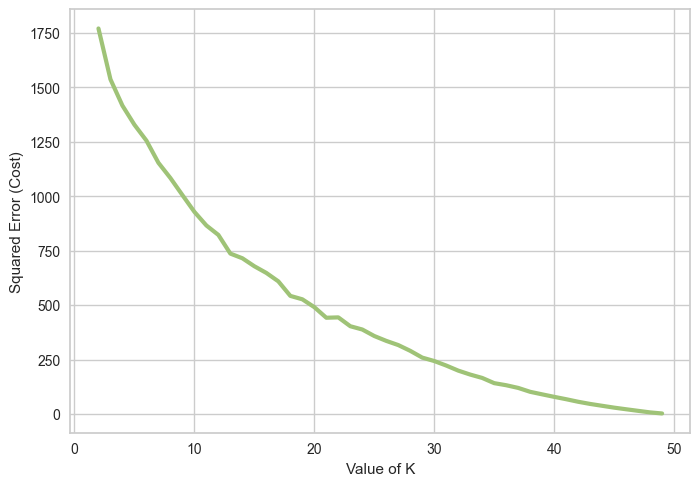

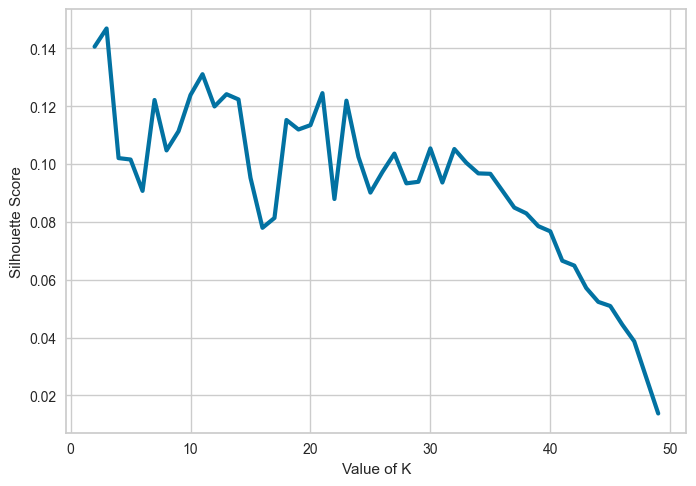

In [157]:
clustering(lifesnaps_all_grouped_pca, 50)

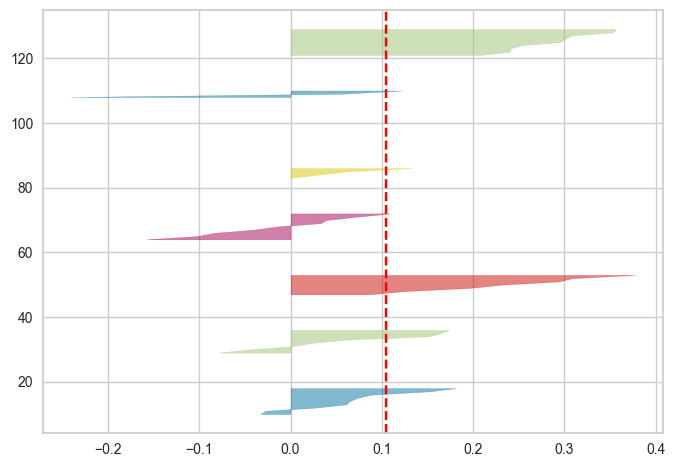

In [158]:
silhouette(lifesnaps_all_grouped_pca, 8)

In [159]:
kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(lifesnaps_all_grouped)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
1          12
2           9
3           8
0           7
4           5
6           5
5           3
7           1
dtype: int64

In [160]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.531266,-0.050110,0.800829,0.591977,0.954578,-1.166414,0.507127,-0.081126,0.977239,-0.170125,...,0.273459,0.561634,0.883921,-0.032870,0.524891,0.428571,0.857143,0.571429,0.571429,0.428571
1,-0.761912,0.270287,-0.489442,0.104794,-0.675864,0.288301,0.033158,-0.105069,-0.738551,-0.170125,...,0.458944,-0.490213,-0.330030,-0.210915,-1.054641,0.833333,0.833333,0.833333,0.750000,1.083333
2,-0.076125,0.053713,-0.697479,-0.101125,-0.732342,0.100598,-0.421863,-0.500359,-0.045156,-0.170125,...,-0.362492,-0.129166,-0.295738,-0.562441,-0.317526,1.222222,1.333333,1.444444,1.000000,1.111111
3,0.876443,-0.741001,0.318119,-0.534616,1.217487,0.004757,0.735178,-0.324583,-0.024261,0.613473,...,-0.779834,-0.082513,0.127773,-0.115045,0.816497,0.875000,0.625000,1.000000,1.125000,0.750000
4,-0.173842,0.282543,0.700289,0.004028,-0.035828,1.022278,1.233838,2.571855,0.376522,-0.170125,...,0.591434,0.461491,0.760468,-0.115045,0.816497,0.600000,0.400000,1.200000,1.000000,1.000000
5,-0.501134,-0.363326,0.433207,-0.449056,0.104847,0.658196,-0.507411,0.367983,-0.736072,-0.170125,...,0.750421,0.179144,-1.173623,0.651920,-1.224745,0.666667,1.333333,0.333333,1.333333,1.000000
6,-0.153400,-0.614018,0.420599,0.036641,-0.035570,-0.348880,0.491550,0.016891,1.502891,0.991894,...,-0.744062,0.373866,-0.251843,1.533930,0.816497,2.000000,1.200000,1.400000,1.400000,0.800000
7,-1.398160,-2.763172,-1.415651,-2.051721,-1.329909,3.255366,0.052335,3.509680,-1.248798,-0.170125,...,0.591434,-0.940508,0.390110,-0.306786,0.816497,1.000000,1.000000,2.000000,0.000000,0.000000


####  Visualization with t-SNE

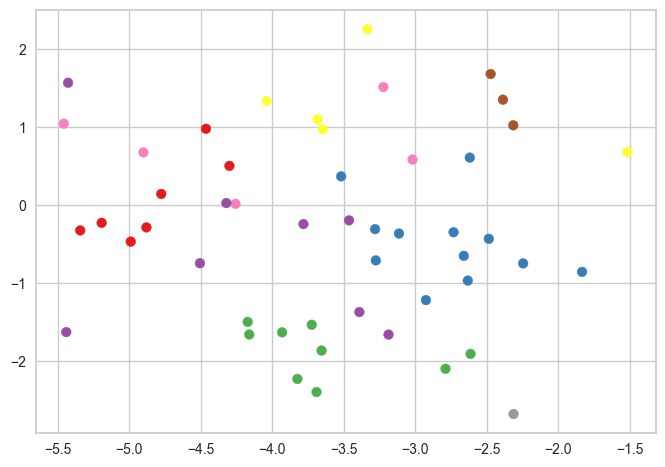

In [161]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
model = kmeans.fit(lifesnaps_all_grouped)
tsne = TSNE().fit_transform(lifesnaps_all_grouped)
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set1')

<AxesSubplot: xlabel='x', ylabel='y'>

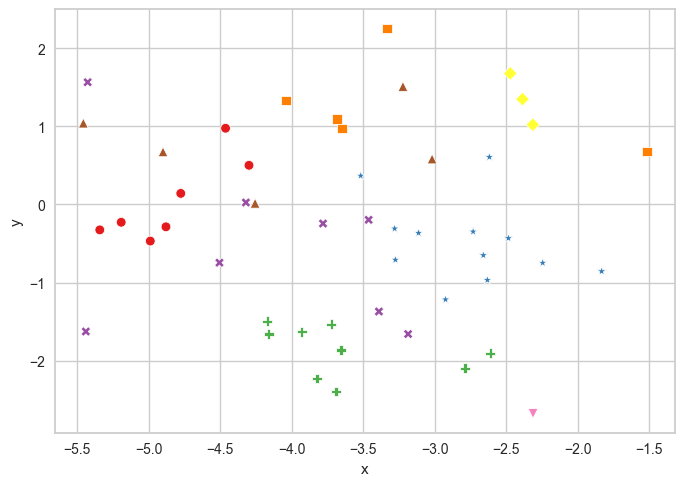

In [162]:
test = pd.concat([pd.DataFrame(tsne, columns=['x','y']),pd.DataFrame(model.labels_, columns=['c'])], axis=1)
mark = ["o", "*", "P", "X", "s", "D", "^", "v"]
sns.scatterplot(data=test, x="x", y="y",palette='Set1', hue="c", style='c', legend=False, markers = mark)

In [163]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,621e2e8e67b776a24055b564,6
1,621e2eaf67b776a2406b14ac,5
2,621e2ed667b776a24085d8d1,1
3,621e2f3967b776a240c654db,3
4,621e2f6167b776a240e082a9,1
5,621e2f7a67b776a240f14425,0
6,621e2f9167b776a240011ccb,1
7,621e2fb367b776a24015accd,3
8,621e2fce67b776a240279baa,3
9,621e2ff067b776a2403eb737,1


In [164]:
lifesnaps_grouped_all = pd.merge(lifesnaps, clusters, on = "id")
lifesnaps_grouped_all

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,dataset,stress,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,22,-0.988831,-0.149042,4,-0.900969,-0.433884,2021,Train,1,4
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,...,29,-0.365341,-0.930874,1,0.623490,0.781831,2021,Train,0,4
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,23.0,...,24,-0.900969,-0.433884,1,0.623490,0.781831,2021,Train,0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,27,-0.623490,-0.781831,0,1.000000,0.000000,2021,Train,0,4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,...,25,-0.826239,-0.563320,4,-0.900969,-0.433884,2021,Train,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,27,-0.623490,-0.781831,6,0.623490,-0.781831,2021,Test,0,3
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,25,-0.826239,-0.563320,1,0.623490,0.781831,2021,Test,0,3
5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,28,-0.500000,-0.866025,4,-0.900969,-0.433884,2021,Test,0,3
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,28,-0.500000,-0.866025,3,-0.900969,0.433884,2021,Test,0,3


In [165]:
lifesnaps_grouped_all.id

0       621e329067b776a2402ffad2
1       621e329067b776a2402ffad2
2       621e329067b776a2402ffad2
3       621e329067b776a2402ffad2
4       621e329067b776a2402ffad2
                  ...           
5141    621e301367b776a24057738e
5142    621e301367b776a24057738e
5143    621e301367b776a24057738e
5144    621e301367b776a24057738e
5145    621e301367b776a24057738e
Name: id, Length: 5146, dtype: object

In [167]:
lifesnaps_grouped_all.to_csv("Final_CSVs/lifesnaps_clusters_all8_new.csv", index = False)

In [4]:
lifesnaps_grouped_all = pd.read_csv('Final_CSVs/lifesnaps_clusters_all8_new.csv')

In [5]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

lifesnaps_grouped_all = lifesnaps_grouped_all.drop('dataset', axis = 1)
lifesnaps_grouped_all

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,stress,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,20.0,22,-0.988831,-0.149042,4,-0.900969,-0.433884,2021,1,4
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,...,64.0,29,-0.365341,-0.930874,1,0.623490,0.781831,2021,0,4
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,23.0,...,76.0,24,-0.900969,-0.433884,1,0.623490,0.781831,2021,0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,90.0,27,-0.623490,-0.781831,0,1.000000,0.000000,2021,0,4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,...,29.0,25,-0.826239,-0.563320,4,-0.900969,-0.433884,2021,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,35.0,27,-0.623490,-0.781831,6,0.623490,-0.781831,2021,0,3
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,0.0,25,-0.826239,-0.563320,1,0.623490,0.781831,2021,0,3
5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,42.0,28,-0.500000,-0.866025,4,-0.900969,-0.433884,2021,0,3
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,58.0,28,-0.500000,-0.866025,3,-0.900969,0.433884,2021,0,3


In [6]:
unique_participants = lifesnaps_grouped_all["Cluster"].unique()
lifesnaps_group = lifesnaps_grouped_all.groupby('Cluster')

In [8]:
for participant in unique_participants:
    print("Group: ",participant)    
    part_df = lifesnaps_group.get_group(participant)

    unique_ids = part_df['id'].unique()
    print("Unique IDs:", unique_ids)

Group:  4
Unique IDs: ['621e329067b776a2402ffad2' '621e33b067b776a240f39e56'
 '621e328667b776a240281372' '621e36c267b776a240ba2756'
 '621e324e67b776a2400191cb']
Group:  0
Unique IDs: ['621e339967b776a240e502de' '621e366567b776a24076a727'
 '621e33ed67b776a2401cf5f7' '621e312a67b776a240164d59'
 '621e314867b776a24029ebf9' '621e2f7a67b776a240f14425'
 '621e30f467b776a240f22944']
Group:  6
Unique IDs: ['621e332267b776a24092a584' '621e333967b776a240a3cd06'
 '621e2e8e67b776a24055b564' '621e337667b776a240ce78ab'
 '621e32af67b776a24045b4cf']
Group:  3
Unique IDs: ['621e32d967b776a240627414' '621e2fb367b776a24015accd'
 '621e33cf67b776a240087de9' '621e36dd67b776a240ce9a45'
 '621e2fce67b776a240279baa' '621e30e467b776a240e817c7'
 '621e2f3967b776a240c654db' '621e301367b776a24057738e']
Group:  1
Unique IDs: ['621e2f6167b776a240e082a9' '621e310d67b776a24003096d'
 '621e30c867b776a240d4aa6c' '621e346f67b776a24081744f'
 '621e335a67b776a240bb12ff' '621e34db67b776a240c9c2be'
 '621e2ed667b776a24085d8d1' '621

In [10]:
for participant in unique_participants:
  print("Group: ", participant)
  part_df = lifesnaps_group.get_group(participant)

  # Count the number of rows for each ID using value_counts()
  id_counts = part_df['id'].value_counts()

  # Print the ID and its corresponding count
  print("ID Counts:")
  for id, count in id_counts.items():
    print(f"  ID: {id}, Count: {count}")

Group:  4
ID Counts:
  ID: 621e328667b776a240281372, Count: 132
  ID: 621e36c267b776a240ba2756, Count: 88
  ID: 621e324e67b776a2400191cb, Count: 76
  ID: 621e33b067b776a240f39e56, Count: 73
  ID: 621e329067b776a2402ffad2, Count: 70
Group:  0
ID Counts:
  ID: 621e312a67b776a240164d59, Count: 109
  ID: 621e33ed67b776a2401cf5f7, Count: 88
  ID: 621e314867b776a24029ebf9, Count: 88
  ID: 621e2f7a67b776a240f14425, Count: 85
  ID: 621e30f467b776a240f22944, Count: 81
  ID: 621e366567b776a24076a727, Count: 71
  ID: 621e339967b776a240e502de, Count: 66
Group:  6
ID Counts:
  ID: 621e332267b776a24092a584, Count: 134
  ID: 621e337667b776a240ce78ab, Count: 114
  ID: 621e333967b776a240a3cd06, Count: 108
  ID: 621e2e8e67b776a24055b564, Count: 71
  ID: 621e32af67b776a24045b4cf, Count: 64
Group:  3
ID Counts:
  ID: 621e32d967b776a240627414, Count: 162
  ID: 621e36dd67b776a240ce9a45, Count: 133
  ID: 621e33cf67b776a240087de9, Count: 82
  ID: 621e2fb367b776a24015accd, Count: 81
  ID: 621e30e467b776a240e81

In [11]:
print(unique_participants)

[4 0 6 3 1 2 5 7]


In [12]:
def train_test_split_per_user(data, train_size=0.7):
    users = list(set(data.id))
    users = sorted(users, reverse=True)  # fix randomness
    total_users = len(users)
    slice = int(train_size * total_users)
    users_train = users[:slice]
    users_test = users[slice:]
    return data[data.id.isin(users_train)], data[data.id.isin(users_test)]

In [20]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "LifeSnaps_Multi_Attribute_Splitting_Output_Files"

accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Group: ",participant)
    part_df = lifesnaps_group.get_group(participant)

    # ----------------------------------------------------

    # before with train_test_split_per_user

    if participant == 5: # ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6
        continue

    if participant == 7: # ValueError: Found array with 0 sample(s) (shape=(0, 60)) while a minimum of 1 is required by SimpleImputer.
        continue

    # train_data, test_data = train_test_split_per_user(part_df)
    train_data, test_data = train_test_split_per_user(part_df)

    fold_groups = train_data.id

    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    part_df = part_df.drop('id', axis = 1)
    grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    # grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, fold_strategy='groupkfold', fold=3, fold_groups=fold_groups, test_data=test_data) #fix_imbalance = True,
    best = compare_models(sort="F1")
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])

    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Extract true labels (y_true), rename the column
    y_true = predictions[['stress']].rename(columns={'stress': 'y_true'})  # Rename using rename()

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})  # Rename using rename()

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = test_data[['age', 'gender', 'bmi']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids, y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")

Group:  4


                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.8096  0.0000  0.7867  0.6957   
lightgbm  Light Gradient Boosting Machine    0.8572  0.9003  0.7100  0.7661   
et                 Extra Trees Classifier    0.8362  0.8992  0.7167  0.7274   
rf               Random Forest Classifier    0.8576  0.9000  0.6767  0.7733   
gbc          Gradient Boosting Classifier    0.8491  0.8832  0.6733  0.7387   
ada                  Ada Boost Classifier    0.8274  0.8972  0.7100  0.7128   
lda          Linear Discriminant Analysis    0.7928  0.8535  0.7300  0.6642   
dt               Decision Tree Classifier    0.8359  0.7701  0.6467  0.6929   
lr                    Logistic Regression    0.7054  0.7672  0.7367  0.4561   
nb                            Naive Bayes    0.6453  0.7581  0.7133  0.3954   
knn                K Neighbors Classifier    0.6583  0.6799  0.5500  0.3761   
svm                   SVM - Linear Kernel    0.3511 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.8012  0.8009  0.7000  0.4569   
ridge                    Ridge Classifier    0.7951  0.0000  0.6667  0.4531   
ada                  Ada Boost Classifier    0.8817  0.7821  0.3667  0.3583   
lightgbm  Light Gradient Boosting Machine    0.8980  0.8746  0.3167  0.4000   
dt               Decision Tree Classifier    0.8690  0.6165  0.3167  0.3150   
lr                    Logistic Regression    0.6458  0.6197  0.7167  0.1602   
nb                            Naive Bayes    0.6362  0.6585  0.7167  0.1472   
gbc          Gradient Boosting Classifier    0.8850  0.8335  0.2333  0.2750   
knn                K Neighbors Classifier    0.6679  0.6116  0.5500  0.1480   
rf               Random Forest Classifier    0.8819  0.8524  0.2167  0.2333   
et                 Extra Trees Classifier    0.8753  0.8322  0.2000  0.2067   
svm                   SVM - Linear Kernel    0.3410 

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.8983  0.9570   0.750  0.6666   
lightgbm  Light Gradient Boosting Machine    0.8927  0.9600   0.650  0.6586   
ada                  Ada Boost Classifier    0.8897  0.9192   0.600  0.6708   
dt               Decision Tree Classifier    0.8812  0.7256   0.525  0.6869   
lda          Linear Discriminant Analysis    0.8019  0.7891   0.800  0.4573   
nb                            Naive Bayes    0.8587  0.8502   0.575  0.5551   
ridge                    Ridge Classifier    0.7905  0.0000   0.775  0.4273   
rf               Random Forest Classifier    0.8700  0.9502   0.575  0.5277   
et                 Extra Trees Classifier    0.8587  0.9381   0.575  0.4395   
knn                K Neighbors Classifier    0.7125  0.7415   0.625  0.2217   
lr                    Logistic Regression    0.4741  0.7266   0.800  0.1873   
svm                   SVM - Linear Kernel    0.5000 

                                    Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.8219  0.8790  0.7357  0.4600   
knn                K Neighbors Classifier    0.7883  0.7806  0.7071  0.4261   
et                 Extra Trees Classifier    0.8856  0.9320  0.5786  0.4965   
lda          Linear Discriminant Analysis    0.7964  0.7956  0.6095  0.4244   
ada                  Ada Boost Classifier    0.8622  0.8594  0.5643  0.4393   
gbc          Gradient Boosting Classifier    0.8640  0.9072  0.5286  0.4418   
ridge                    Ridge Classifier    0.7846  0.0000  0.6024  0.3801   
rf               Random Forest Classifier    0.8718  0.9143  0.4810  0.4140   
lr                    Logistic Regression    0.6811  0.7817  0.6929  0.4127   
dt               Decision Tree Classifier    0.8524  0.6831  0.4595  0.4464   
lightgbm  Light Gradient Boosting Machine    0.8661  0.9186  0.4333  0.4257   
svm                   SVM - Linear Kernel    0.6459 

                                    Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.8263  0.6973  0.5143  0.5161   
et                 Extra Trees Classifier    0.8063  0.8711  0.5857  0.4957   
rf               Random Forest Classifier    0.8158  0.8698  0.5429  0.5064   
ada                  Ada Boost Classifier    0.8158  0.8612  0.5643  0.4332   
gbc          Gradient Boosting Classifier    0.8032  0.8747  0.5643  0.4566   
lda          Linear Discriminant Analysis    0.6737  0.7552  0.6786  0.3156   
ridge                    Ridge Classifier    0.6779  0.0000  0.6857  0.3011   
lightgbm  Light Gradient Boosting Machine    0.8021  0.8646  0.4571  0.4655   
qda       Quadratic Discriminant Analysis    0.8053  0.8276  0.4429  0.4209   
nb                            Naive Bayes    0.6747  0.7383  0.6357  0.3009   
lr                    Logistic Regression    0.6432  0.5881  0.5000  0.2548   
knn                K Neighbors Classifier    0.6463 

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.9548  0.9864  0.8233  0.7744   
rf               Random Forest Classifier    0.9496  0.9873  0.7867  0.6810   
et                 Extra Trees Classifier    0.9429  0.9736  0.7833  0.6533   
lightgbm  Light Gradient Boosting Machine    0.9336  0.9802  0.7500  0.6289   
lda          Linear Discriminant Analysis    0.8938  0.8347  0.7700  0.6113   
ridge                    Ridge Classifier    0.8938  0.0000  0.7733  0.5941   
ada                  Ada Boost Classifier    0.9390  0.9379  0.6367  0.5869   
dt               Decision Tree Classifier    0.9283  0.7857  0.6200  0.6156   
lr                    Logistic Regression    0.8751  0.7818  0.7433  0.5070   
knn                K Neighbors Classifier    0.8072  0.8020  0.6633  0.3510   
nb                            Naive Bayes    0.8140  0.8513  0.7467  0.2863   
qda       Quadratic Discriminant Analysis    0.9350 

In [21]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "LifeSnaps_Multi_Attribute_Splitting_Output_Files"

accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Group: ",participant)
    part_df = lifesnaps_group.get_group(participant)

    # ----------------------------------------------------

    if participant != 5:
        continue
    
    if participant == 5:
        train_size = 2
        test_size = 1

    # Extract IDs and sort for clear separation
    unique_ids = sorted(part_df['id'].unique())

    # Get train and test data IDs
    train_ids = unique_ids[:train_size]
    test_ids = unique_ids[-test_size:]

    # Filter data based on IDs
    train_data = part_df[part_df['id'].isin(train_ids)]
    test_data = part_df[part_df['id'].isin(test_ids)]

    fold_groups = train_data.id

    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    part_df = part_df.drop('id', axis = 1)
    grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    # grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, fold_strategy='groupkfold', fold=3, fold_groups=fold_groups, test_data=test_data) #fix_imbalance = True,
    best = compare_models(sort="F1")
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])

    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Extract true labels (y_true), rename the column
    y_true = predictions[['stress']].rename(columns={'stress': 'y_true'})  # Rename using rename()

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})  # Rename using rename()

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = test_data[['age', 'gender', 'bmi']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids, y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")

Group:  4
Group:  0
Group:  6
Group:  3
Group:  1
Group:  2
Group:  5


                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9617  0.7795     0.6  0.5333   
et                 Extra Trees Classifier    0.9617  0.7862     0.6  0.5333   
lightgbm  Light Gradient Boosting Machine    0.9746  0.7795     0.6  0.5000   
lr                    Logistic Regression    0.7271  0.6367     0.7  0.4403   
lda          Linear Discriminant Analysis    0.8962  0.6852     0.6  0.4083   
nb                            Naive Bayes    0.7350  0.6348     0.6  0.4325   
ridge                    Ridge Classifier    0.9033  0.0000     0.6  0.3917   
ada                  Ada Boost Classifier    0.9683  0.7581     0.5  0.4000   
dt               Decision Tree Classifier    0.9554  0.6364     0.5  0.3833   
gbc          Gradient Boosting Classifier    0.9554  0.6933     0.5  0.3833   
knn                K Neighbors Classifier    0.6767  0.4817     0.4  0.0743   
svm                   SVM - Linear Kernel    0.8629 

In [22]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [23]:
print("Mean Accuracy Lifesnaps - Cluster All Features: ", mean_acc)
print("Mean Precision Lifesnaps- Cluster All Features: ", mean_prec)
print("Mean Recall Lifesnaps- Cluster All Features: ", mean_rec)
print("Mean F1-score Lifesnaps- Cluster All Features: ", mean_f1)

Mean Accuracy Lifesnaps - Cluster All Features:  0.9617
Mean Precision Lifesnaps- Cluster All Features:  0.5333
Mean Recall Lifesnaps- Cluster All Features:  0.6
Mean F1-score Lifesnaps- Cluster All Features:  0.55


In [25]:
import os  # Import os module for folder creation

# Specify folder name
folder_name = "LifeSnaps_Multi_Attribute_Splitting_Output_Files"

accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Group: ",participant)
    part_df = lifesnaps_group.get_group(participant)

    # ----------------------------------------------------

    # if participant in [5, 7]:
    if participant == 7:
        train_data, test_data = train_test_split_per_user(part_df)
        # train_data, test_data = train_test_split_per_user(part_df)

        # Extracting necessary columns from test_data
        extracted_data = test_data[['id', 'age', 'gender', 'bmi', 'stress']]

        # Renaming 'stress' column to 'y_true'
        extracted_data = extracted_data.rename(columns={'stress': 'y_true'})

        # Creating a NaN 'y_pred' column
        extracted_data['y_pred'] = np.nan

        # Reordering columns
        extracted_data = extracted_data[['id', 'y_true', 'y_pred', 'age', 'gender', 'bmi']]

        # Create filename
        filename = f"predictions_{participant}.csv"

        # Create folder if it doesn't exist
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)  # Create folder using makedirs()

        # Create full path with folder name
        filepath = os.path.join(folder_name, filename)

        # Save predictions
        extracted_data.to_csv(filepath, index=False)

        print(f"Predictions saved to: {filepath}")


Group:  4
Group:  0
Group:  6
Group:  3
Group:  1
Group:  2
Group:  5
Group:  7
Predictions saved to: LifeSnaps_Multi_Attribute_Splitting_Output_Files\predictions_7.csv


In [13]:
folder_path = "LifeSnaps_Multi_Attribute_Splitting_Output_Files"

# List all CSV files in the folder:
csv_files = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        csv_files.append(os.path.join(folder_path, filename))

# Concatenate files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [14]:
output_folder = "Output_Files"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)  # Create folder using makedirs()

# Create the full path with the output folder name
output_filepath = os.path.join(output_folder, "LifeSnaps_Multi_Attribute_Splitting.csv")

# Save the concatenated DataFrame to the new CSV file
combined_df.to_csv(output_filepath, index=False)

print(f"All predictions saved to: {output_filepath}")

All predictions saved to: Output_Files\LifeSnaps_Multi_Attribute_Splitting.csv


In [15]:
predictions = pd.read_csv('Output_Files/LifeSnaps_Multi_Attribute_Splitting.csv')

In [16]:
predictions['bmi'] = predictions.bmi.apply(lambda bmi: 0 if bmi < 18.5 else (1 if bmi < 25 else (
    2 if bmi < 30 else 3)))  # 0: Underweight, 1: Normal, 2: Overweight, 3: Obese


In [17]:
predictions.to_csv('Output_Files/LifeSnaps_Multi_Attribute_Splitting.csv', index=False)